In [1]:
using DelimitedFiles
using PyPlot; using MDToolbox;
PyPlot.plt[:style][:use]("seaborn-colorblind");
ENV["COLUMNS"] = 150; #display width for MDToolbox

In [2]:
K = 20
phi = []; psi = [];
for k = 1:1
    filename = "../4_sort_dcd/remd_paramID$(k).tor"
    d = readdlm(filename)
    phi = [phi; d[:, 2]];
    psi = [psi; d[:, 3]];
    print(filename)
end

phi = map(Float64, phi);
psi = map(Float64, psi);

../4_sort_dcd/remd_paramID1.tor

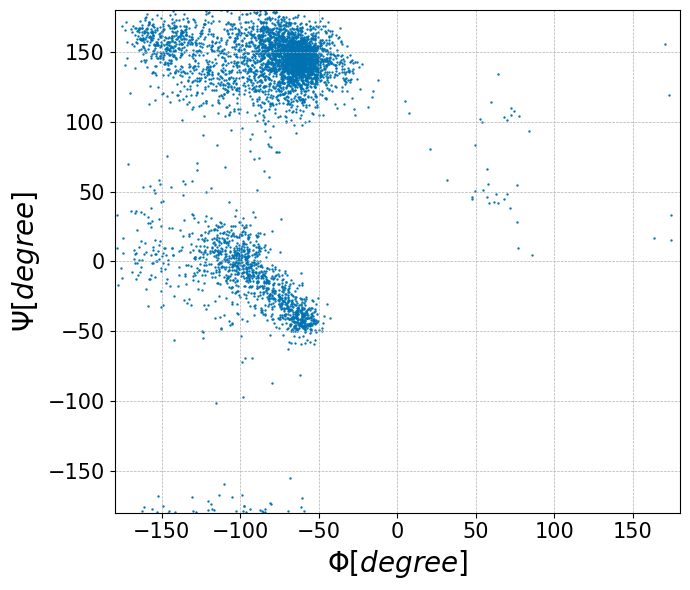

In [3]:
fig, ax = subplots(figsize=(7, 6));
ax[:scatter](phi, psi, s=0.5);
xlabel(L"\Phi [degree]",fontsize=20);
ylabel(L"\Psi [degree]",fontsize=20);

# detailed options (not necessary, just for reference)
ax[:set](xlim=[-180, 180], ylim=[-180, 180]);
ax[:xaxis][:set_tick_params](which="major",labelsize=15);
ax[:yaxis][:set_tick_params](which="major",labelsize=15);
ax[:grid](linestyle="--", linewidth=0.5);
tight_layout();

savefig("scatter1.png", dpi=350);

In [4]:
grid_x = -180:1:180;
grid_y = -180:1:180;
pmf, grid_x, grid_y = compute_pmf(phi, psi, grid_x=grid_x, grid_y=grid_y, bandwidth=[2.0, 2.0], boxsize=[360.0, 360.0]);
#KBT = 300.0 * KB_KCALPERMOL
KB = 0.001987191682600
KBT = 300.0 *KB
pmf = KBT .* pmf;

In [5]:
length(phi)

5000

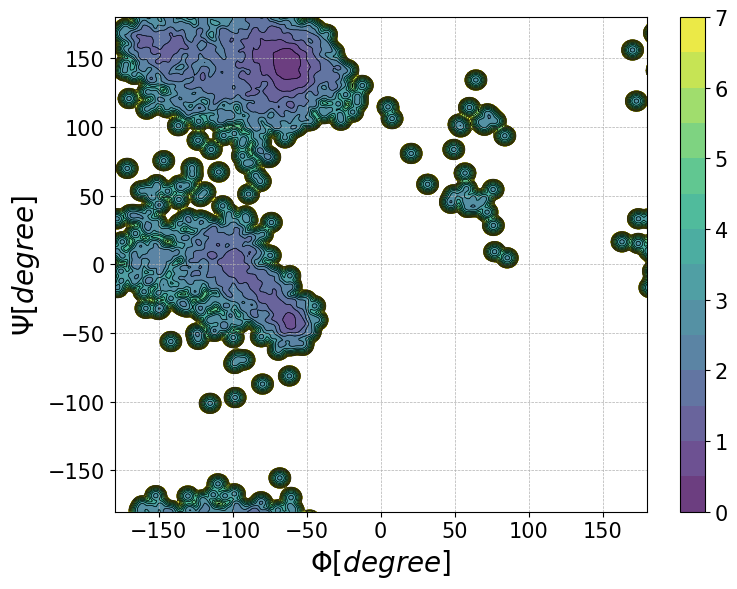

In [6]:
fig, ax = subplots(figsize=(8, 6));
meshgrid(x, y) = (repeat(x', length(y), 1), repeat(y, 1, length(x)));
X, Y = meshgrid(grid_x, grid_y);
levels = 0:0.5:7;
ax[:contour](X, Y, pmf, levels, colors="black", alpha=1.0, linewidths=0.5);
pos = ax[:contourf](X, Y, pmf, levels, alpha=0.8, cmap=get_cmap("viridis")) # colormaps: viridis, plasma, inferno, magma, jet, hsv, terrain
cbar = fig[:colorbar](pos, ax=ax);
cbar[:ax][:tick_params](labelsize=15);
xlabel(L"\Phi [degree]",fontsize=20);
ylabel(L"\Psi [degree]",fontsize=20);

# detailed options (not necessary, just for reference)
ax[:set](xlim=[-180, 180], ylim=[-180, 180]);
ax[:tick_params](axis="both", which="major",labelsize=15);
ax[:grid](linestyle="--", linewidth=0.5);
tight_layout();

savefig("surface1.png", dpi=350, bbox_inches="tight");

In [7]:
K = 20
phi = []; psi = [];
for k = 1:20
    filename = "../4_sort_dcd/remd_paramID$(k).tor"
    d = readdlm(filename)
    phi = [phi; d[:, 2]];
    psi = [psi; d[:, 3]];
    print(filename)
end

weight = [];
for k = 1:20
    filename = "./weight$(k).dat"
    d = readdlm(filename)
    weight = [weight; d[:, 2]];
    print(filename)
end

phi = map(Float64, phi);
psi = map(Float64, psi);
weight = map(Float64, weight);

../4_sort_dcd/remd_paramID1.tor../4_sort_dcd/remd_paramID2.tor../4_sort_dcd/remd_paramID3.tor../4_sort_dcd/remd_paramID4.tor../4_sort_dcd/remd_paramID5.tor../4_sort_dcd/remd_paramID6.tor../4_sort_dcd/remd_paramID7.tor../4_sort_dcd/remd_paramID8.tor../4_sort_dcd/remd_paramID9.tor../4_sort_dcd/remd_paramID10.tor../4_sort_dcd/remd_paramID11.tor../4_sort_dcd/remd_paramID12.tor../4_sort_dcd/remd_paramID13.tor../4_sort_dcd/remd_paramID14.tor../4_sort_dcd/remd_paramID15.tor../4_sort_dcd/remd_paramID16.tor../4_sort_dcd/remd_paramID17.tor../4_sort_dcd/remd_paramID18.tor../4_sort_dcd/remd_paramID19.tor../4_sort_dcd/remd_paramID20.tor./weight1.dat./weight2.dat./weight3.dat./weight4.dat./weight5.dat./weight6.dat./weight7.dat./weight8.dat./weight9.dat./weight10.dat./weight11.dat./weight12.dat./weight13.dat./weight14.dat./weight15.dat./weight16.dat./weight17.dat./weight18.dat./weight19.dat./weight20.dat

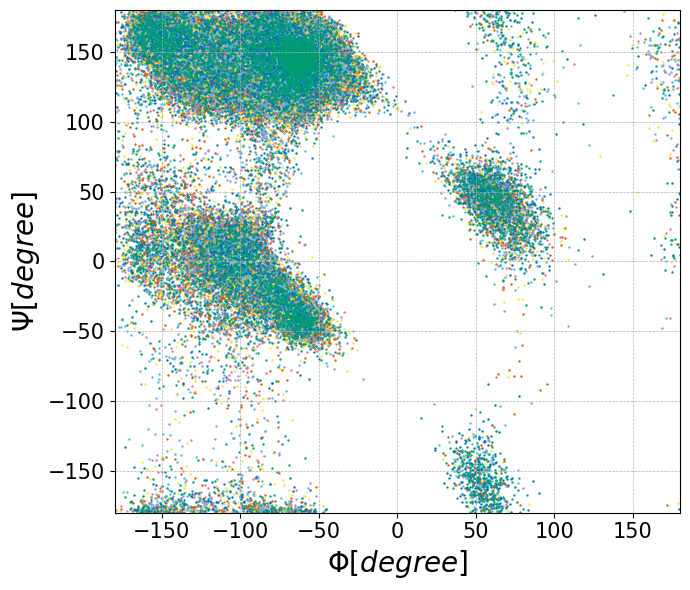

In [8]:
fig, ax = subplots(figsize=(7, 6));
for k = 1:K
    index = ((k-1)*5000+1):(k*5000)
    ax[:scatter](phi[index], psi[index], s=0.5);
end
xlabel(L"\Phi [degree]",fontsize=20);
ylabel(L"\Psi [degree]",fontsize=20);

# detailed options (not necessary, just for reference)
ax[:set](xlim=[-180, 180], ylim=[-180, 180]);
ax[:xaxis][:set_tick_params](which="major",labelsize=15);
ax[:yaxis][:set_tick_params](which="major",labelsize=15);
ax[:grid](linestyle="--", linewidth=0.5);
tight_layout();

savefig("scatter1-20.png", dpi=350);

In [9]:
grid_x = -180:1:180;
grid_y = -180:1:180;
pmf, grid_x, grid_y = compute_pmf(phi, psi, grid_x=grid_x, grid_y=grid_y, bandwidth=[2.0, 2.0], boxsize=[360.0, 360.0], weight=weight);
#KBT = 300.0 * KB_KCALPERMOL
KB = 0.001987191682600
KBT = 300.0 *KB
pmf = KBT .* pmf;

In [10]:
length(phi)

100000

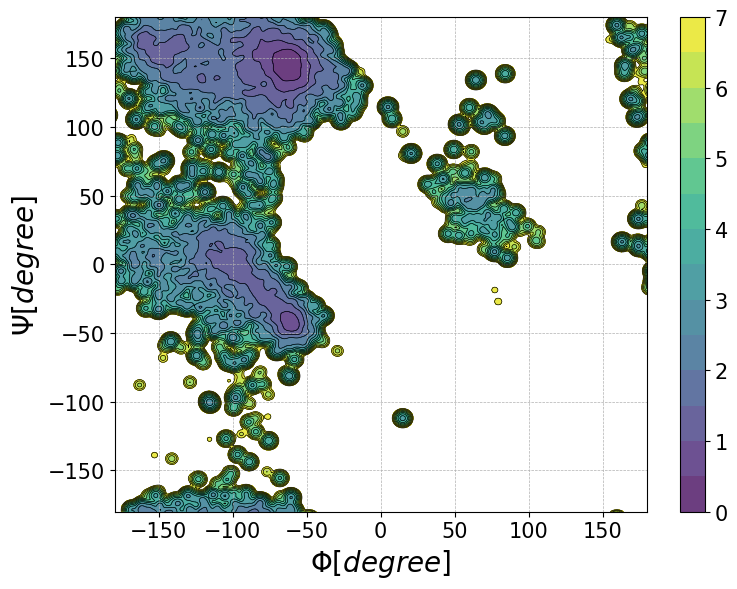

In [11]:
fig, ax = subplots(figsize=(8, 6));
meshgrid(x, y) = (repeat(x', length(y), 1), repeat(y, 1, length(x)));
X, Y = meshgrid(grid_x, grid_y);
levels = 0:0.5:7;
ax[:contour](X, Y, pmf, levels, colors="black", alpha=1.0, linewidths=0.5);
pos = ax[:contourf](X, Y, pmf, levels, alpha=0.8, cmap=get_cmap("viridis")) # colormaps: viridis, plasma, inferno, magma, jet, hsv, terrain
cbar = fig[:colorbar](pos, ax=ax);
cbar[:ax][:tick_params](labelsize=15);
xlabel(L"\Phi [degree]",fontsize=20);
ylabel(L"\Psi [degree]",fontsize=20);

# detailed options (not necessary, just for reference)
ax[:set](xlim=[-180, 180], ylim=[-180, 180]);
ax[:tick_params](axis="both", which="major",labelsize=15);
ax[:grid](linestyle="--", linewidth=0.5);
tight_layout();

savefig("surface1-20.png", dpi=350, bbox_inches="tight");

In [12]:
size(phi)

(100000,)